In [1]:
#this cell contains all the imports needed by the pipeline
#to run it on the browser: jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
import os
import time

import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import statistics
import csv

from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import BackendSampler
from qiskit_algorithms import QAOA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_aer import AerSimulator
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
from collections import defaultdict

In [8]:
bootqa_programs = ["gsdtsr","paintcontrol", "iofrol", "elevator", "elevator2"]
bootqa_programs_rep_values = {"gsdtsr":1,"paintcontrol":1,"iofrol":2, "elevator":4, "elevator2":4}
experiments = 10

In [9]:
def get_data(data_name):
    """Read the datasets"""
    if data_name == "elevator":
        data = pd.read_csv("datasets/quantum_sota_datasets/elevator.csv", dtype={"cost": int, "input_div": float})
    elif data_name == "elevator2":
        data = pd.read_csv("datasets/quantum_sota_datasets/elevator.csv", dtype={"cost": int, "pcount": int, "dist": int})
    else:
        data = pd.read_csv("datasets/quantum_sota_datasets/" + data_name + ".csv", dtype={"time": float, "rate": float})
        data = data[data['rate'] > 0]
    return data

Tot suite cost: 48374589.23585534
Tot suite rate: 8.743228702983895
SelectQAOA Decomposition Time(ms): 1.065969467163086
Cluster 26 metrics:
Test Cases: [0, 1, 2, 4, 75, 76, 77, 198, 204, 209, 210, 237, 238, 244, 245, 246, 260]
 - Num. Test Cases: 17.00
 - Execution Cost: 933258.44
 - Failure Rate: 0.0541395052819926
Cluster 20 metrics:
Test Cases: [3, 15, 16, 21, 27, 91, 97, 98, 113, 149, 174, 190, 250, 252]
 - Num. Test Cases: 14.00
 - Execution Cost: 1685788.23
 - Failure Rate: 0.039853968603230205
Cluster 6 metrics:
Test Cases: [6]
 - Num. Test Cases: 1.00
 - Execution Cost: 92685.55
 - Failure Rate: 0.3805584281282316
Cluster 27 metrics:
Test Cases: [8, 104, 139, 247, 271]
 - Num. Test Cases: 5.00
 - Execution Cost: 288771.38
 - Failure Rate: 0.08763195412764099
Cluster 47 metrics:
Test Cases: [9, 32, 83, 127, 180]
 - Num. Test Cases: 5.00
 - Execution Cost: 1375122.84
 - Failure Rate: 0.0499362109595096
Cluster 38 metrics:
Test Cases: [10, 41, 205, 206, 233]
 - Num. Test Cases: 5

/var/folders/kn/kd67nwcs41113fgwjn39d7fm0000gn/T/ipykernel_4192/1817791898.py:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(clustered_data))  # A colormap with as many colors as clusters


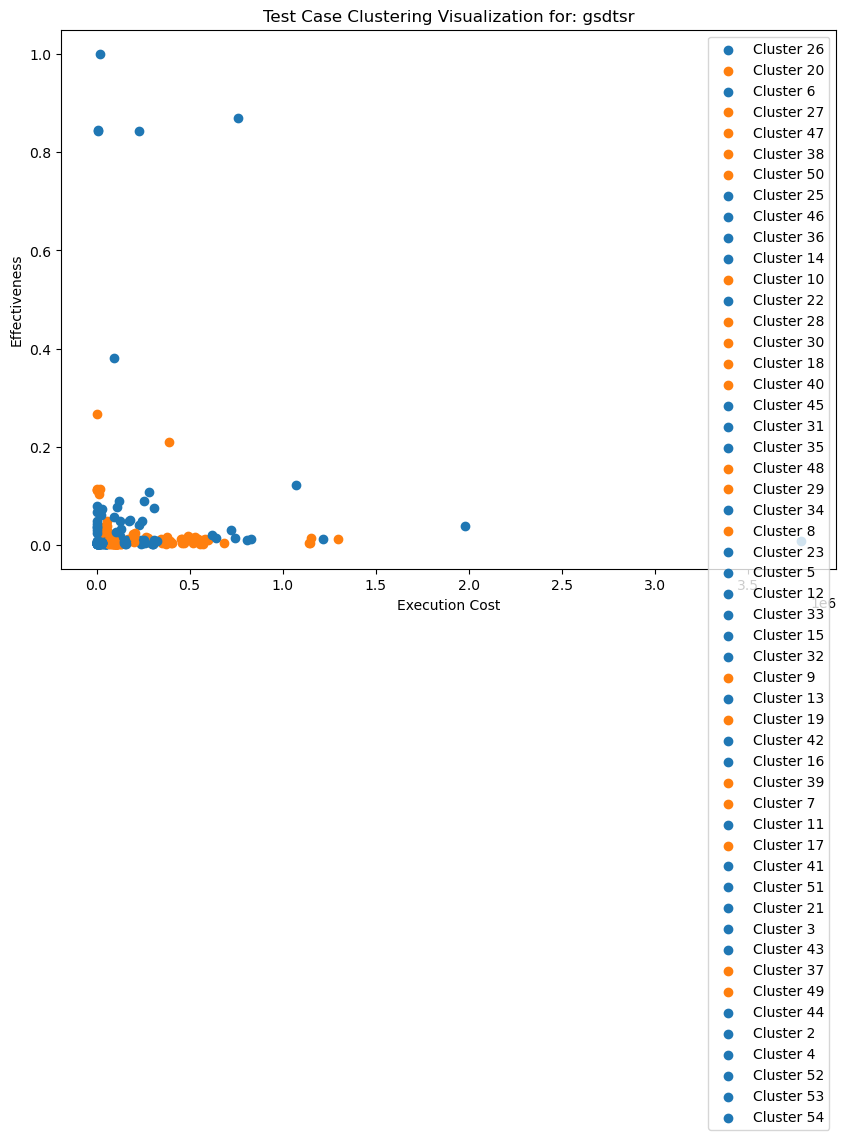

Tot suite cost: 3005225.0
Tot suite rate: 20.317411495740192
SelectQAOA Decomposition Time(ms): 0.5831718444824219
Cluster 5 metrics:
Test Cases: [30]
 - Num. Test Cases: 1.00
 - Execution Cost: 475631.00
 - Failure Rate: 0.6
Cluster 4 metrics:
Test Cases: [62, 77, 80, 84, 86]
 - Num. Test Cases: 5.00
 - Execution Cost: 304628.00
 - Failure Rate: 4.074430945398688
Cluster 6 metrics:
Test Cases: [0, 1, 2, 3, 5, 8, 10, 13, 15, 18, 19, 20, 23, 24, 32, 33, 35, 36, 37, 38, 39, 40]
 - Num. Test Cases: 22.00
 - Execution Cost: 466749.00
 - Failure Rate: 3.3957481447940068
Cluster 7 metrics:
Test Cases: [41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 63, 81]
 - Num. Test Cases: 21.00
 - Execution Cost: 394723.00
 - Failure Rate: 3.146439817496359
Cluster 8 metrics:
Test Cases: [4, 6, 7, 9, 11, 12, 14, 16, 17, 21, 22, 25, 26, 27, 28, 29, 31, 34, 47, 55]
 - Num. Test Cases: 20.00
 - Execution Cost: 737746.00
 - Failure Rate: 4.508784682213448
Cluster 9 metrics:
Test 

/var/folders/kn/kd67nwcs41113fgwjn39d7fm0000gn/T/ipykernel_4192/1817791898.py:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(clustered_data))  # A colormap with as many colors as clusters


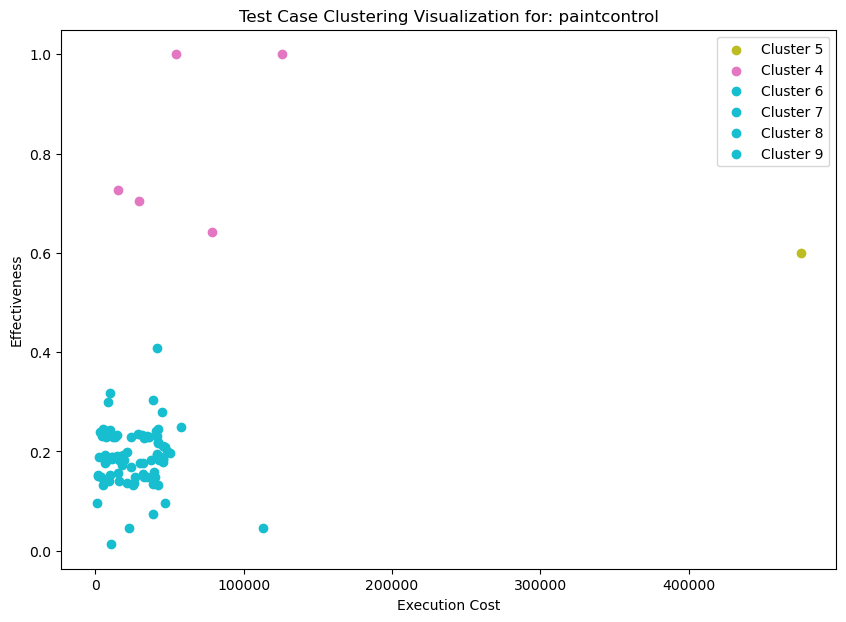

Tot suite cost: 181552513.0
Tot suite rate: 583.2324431573749
SelectQAOA Decomposition Time(ms): 22.237300872802734
Cluster 8 metrics:
Test Cases: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 28]
 - Num. Test Cases: 24.00
 - Execution Cost: 1381346.00
 - Failure Rate: 6.029793735676086
Cluster 9 metrics:
Test Cases: [29, 32, 33, 34, 35, 52, 53, 57, 61, 65, 67, 69, 71, 72, 76, 78, 80, 81, 85, 87, 90, 118, 167, 194]
 - Num. Test Cases: 24.00
 - Execution Cost: 1378655.00
 - Failure Rate: 7.730511399445956
Cluster 10 metrics:
Test Cases: [198, 199, 200, 201, 202, 206, 212, 216, 217, 218, 219, 220, 221, 224, 228, 237, 239, 244, 249, 250, 254, 255, 258, 263]
 - Num. Test Cases: 24.00
 - Execution Cost: 1319015.00
 - Failure Rate: 6.488328839267987
Cluster 11 metrics:
Test Cases: [265, 266, 267, 273, 278, 279, 280, 281, 283, 284, 304, 306, 310, 311, 328, 330, 331, 333, 334, 335, 336, 344, 345, 349]
 - Num. Test Cases: 24.00
 - Execution Cost: 1352821.00

/var/folders/kn/kd67nwcs41113fgwjn39d7fm0000gn/T/ipykernel_4192/1817791898.py:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(clustered_data))  # A colormap with as many colors as clusters


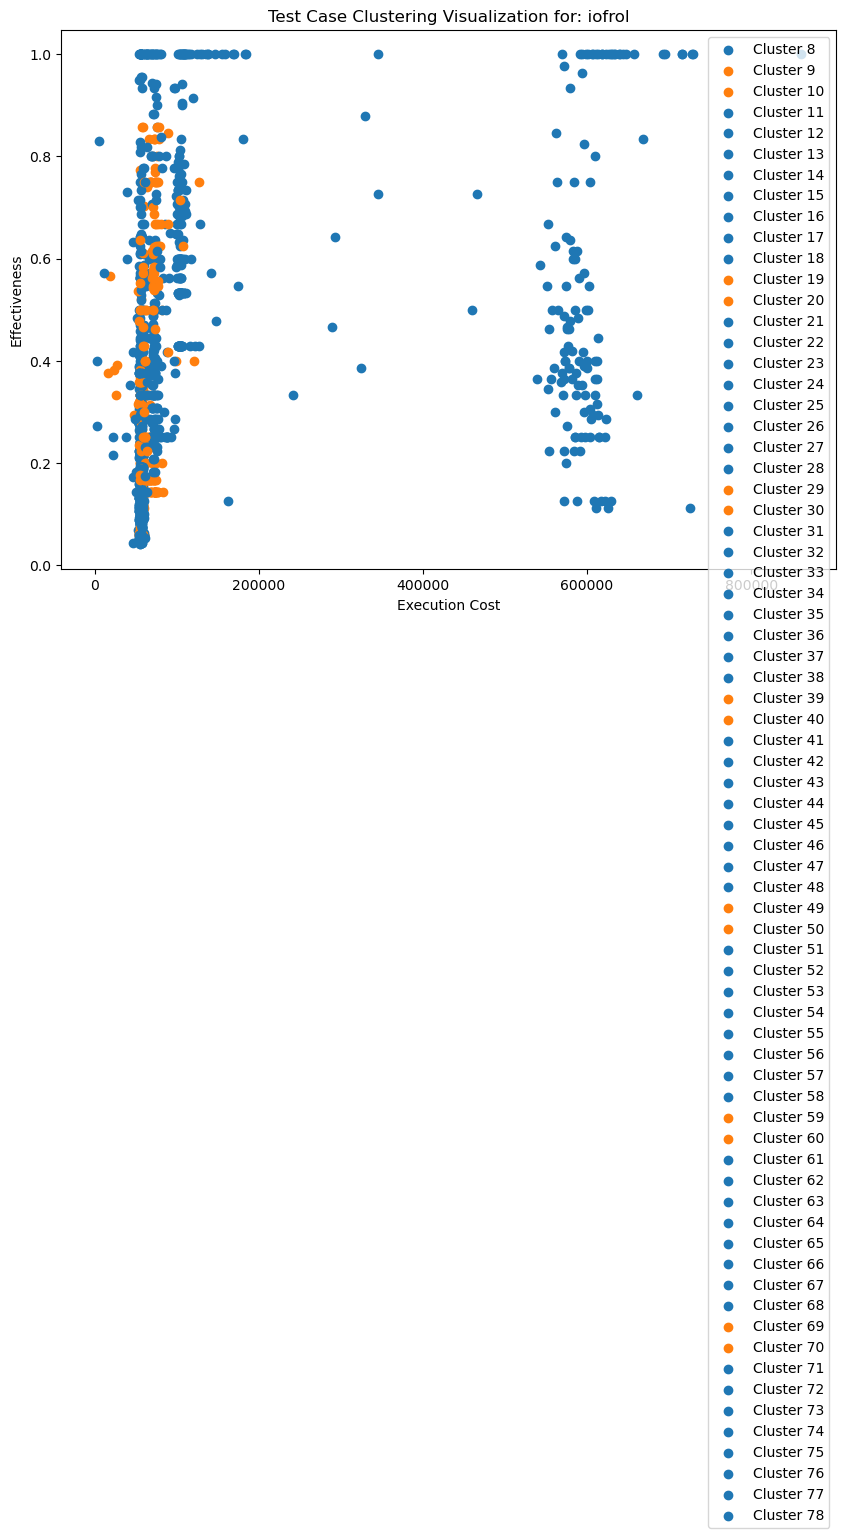

Tot suite cost: 307046
Tot suite input div: 782.986180950525
SelectQAOA Decomposition Time(ms): 29.282093048095703
Cluster 27 metrics:
Test Cases: [1, 267, 312, 329, 422, 548, 597, 713, 731, 976, 1016, 1044, 1161, 1272, 1830, 1852]
 - Num. Test Cases: 16.00
 - Execution Cost: 3165.00
 - Failure Rate: 13.667700233256395
Cluster 6 metrics:
Test Cases: [3, 33, 225, 247, 452, 476, 557, 717, 981, 1088, 1151, 1264, 1584, 1656, 1680, 1709, 1737]
 - Num. Test Cases: 17.00
 - Execution Cost: 1322.00
 - Failure Rate: 14.173739704773274
Cluster 85 metrics:
Test Cases: [5, 93, 441, 536, 829, 952, 1066, 1227, 1325, 1328, 1378, 1546, 1629, 1753, 1873, 1885, 1915]
 - Num. Test Cases: 17.00
 - Execution Cost: 2808.00
 - Failure Rate: 2.028337253402667
Cluster 31 metrics:
Test Cases: [12, 390, 570, 1166, 1194, 1256, 1580, 1739, 1808]
 - Num. Test Cases: 9.00
 - Execution Cost: 2386.00
 - Failure Rate: 9.091768409118085
Cluster 11 metrics:
Test Cases: [13, 96, 152, 187, 385, 523, 563, 745, 996, 1075]
 -

/var/folders/kn/kd67nwcs41113fgwjn39d7fm0000gn/T/ipykernel_4192/1817791898.py:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(clustered_data))  # A colormap with as many colors as clusters


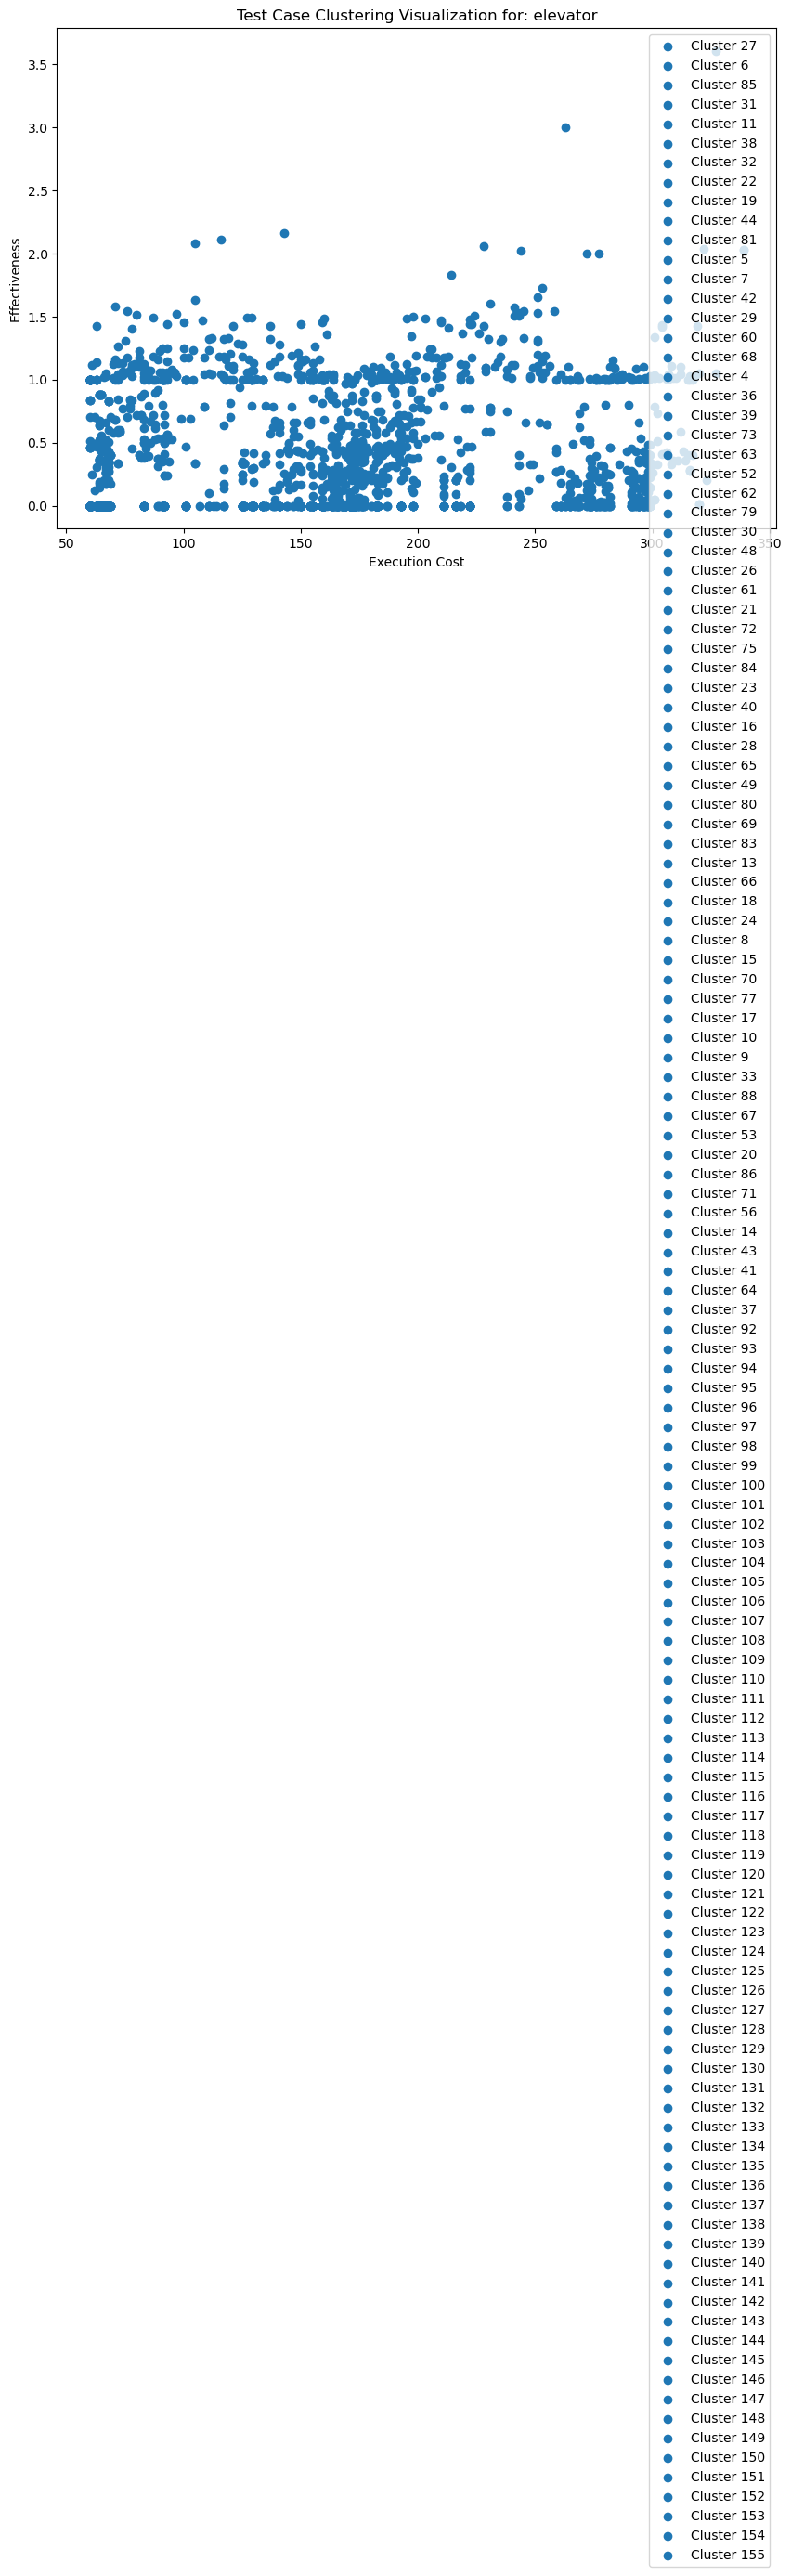

Tot suite cost: 307046
Tot suite pcount: 19878
Tot suite dist: 61549
SelectQAOA Decomposition Time(ms): 34.87801551818848
Cluster 83 metrics:
Test Cases: [2, 233, 330, 376, 538, 539, 601, 643, 934, 1050, 1242, 1376, 1440, 1457, 1594, 1648, 1798, 1812, 1838]
 - Num. Test Cases: 19.00
 - Execution Cost: 5241.00
 - PCount: 699
 - Dist: 1850
Cluster 46 metrics:
Test Cases: [5, 13, 110, 187, 198, 256, 456, 523, 651, 776, 829, 915, 1098, 1446, 1470, 1888]
 - Num. Test Cases: 16.00
 - Execution Cost: 2495.00
 - PCount: 74
 - Dist: 315
Cluster 7 metrics:
Test Cases: [9, 123, 132, 180, 225, 231, 338, 493, 533, 608, 621, 670, 963, 1076, 1122, 1196, 1387, 1464, 1487, 1536, 1556, 1621, 1890, 1911]
 - Num. Test Cases: 24.00
 - Execution Cost: 2105.00
 - PCount: 116
 - Dist: 235
Cluster 66 metrics:
Test Cases: [10, 125, 394, 599, 924, 1297, 1337, 1359, 1712, 1780]
 - Num. Test Cases: 10.00
 - Execution Cost: 2817.00
 - PCount: 195
 - Dist: 993
Cluster 67 metrics:
Test Cases: [12, 26, 44, 200, 295, 4

/var/folders/kn/kd67nwcs41113fgwjn39d7fm0000gn/T/ipykernel_4192/1817791898.py:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(clustered_data))  # A colormap with as many colors as clusters


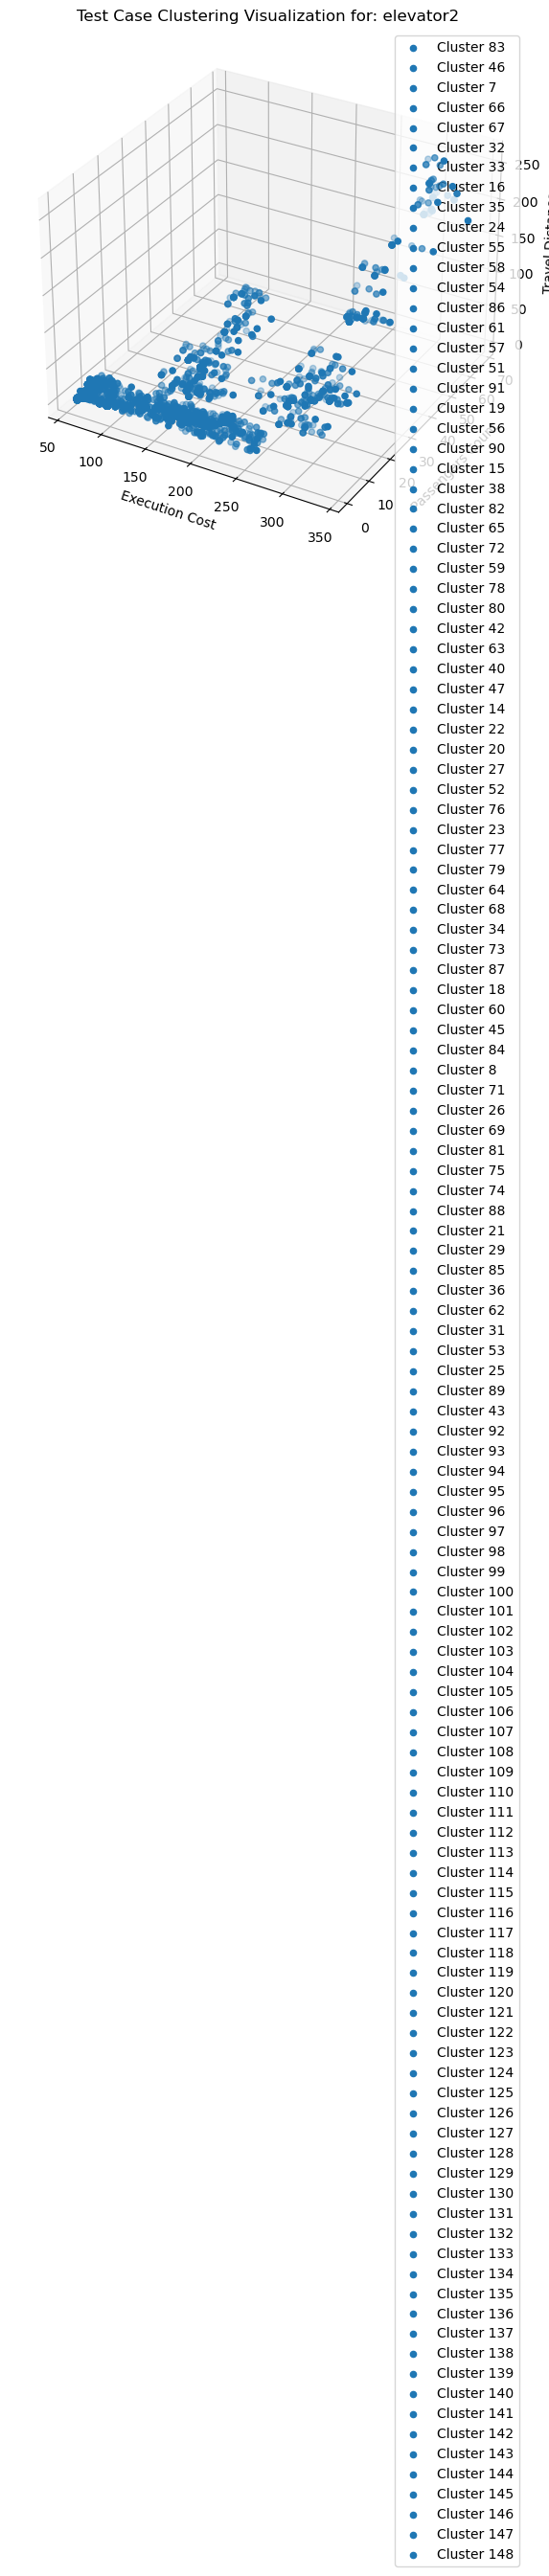

In [10]:
bootqa_clusters = dict()

for bootqa_program in bootqa_programs:
    data = get_data(bootqa_program)
    
    # Total suite metrics
    if bootqa_program == "elevator" or bootqa_program == "elevator2":
        test_cases_costs = data["cost"].tolist()
    else:
        test_cases_costs = data["time"].tolist()
    
    if bootqa_program == "elevator":
        test_cases_effectiveness = data["input_div"].tolist()
        print(f"Tot suite cost: {sum(test_cases_costs)}")
        print(f"Tot suite input div: {sum(test_cases_effectiveness)}")
    elif bootqa_program == "elevator2":
        test_cases_pcount = data["pcount"].tolist()
        test_cases_dist = data["dist"].tolist()
        print(f"Tot suite cost: {sum(test_cases_costs)}")
        print(f"Tot suite pcount: {sum(test_cases_pcount)}")
        print(f"Tot suite dist: {sum(test_cases_dist)}")
    else:
        test_cases_effectiveness = data["rate"].tolist()
        print(f"Tot suite cost: {sum(test_cases_costs)}")
        print(f"Tot suite rate: {sum(test_cases_effectiveness)}")
        
    # Normalize data
    if bootqa_program != "elevator2":
        cluster_data = np.column_stack((test_cases_costs, test_cases_effectiveness))
    else:
        cluster_data = np.column_stack((test_cases_costs, test_cases_pcount, test_cases_dist))
    
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(cluster_data)
    
    if bootqa_program == "elevator" or bootqa_program == "elevator2":
        num_clusters = 90
    if bootqa_program == "gsdtsr":
        num_clusters = 50
    if bootqa_program == "iofrol":
        num_clusters = 6
    if bootqa_program == "paintcontrol":
        num_clusters = 4
        
    max_cluster_dim = 24
    
    # Step 2: Perform K-Means Clustering
    start = time.time()
    linkage_matrix = linkage(normalized_data, method='ward')
    clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')
    
    # Organize test cases by cluster
    clustered_data = defaultdict(list)
    for idx, cluster_id in enumerate(clusters):
        clustered_data[cluster_id].append(idx)
    
    # Process clusters to ensure none exceed max_cluster_dim
    new_cluster_id = max(clustered_data.keys()) + 1  # Start new IDs after existing ones
    to_add = []  # Collect new smaller clusters
    
    for cluster_id, elements in list(clustered_data.items()):  # Avoid modifying dict during iteration
        if len(elements) > max_cluster_dim:
            num_splits = -(-len(elements) // max_cluster_dim)  # Ceiling division to get the required number of splits
            split_size = -(-len(elements) // num_splits)  # Recalculate to distribute elements evenly
            
            # Split while keeping sizes balanced
            parts = [elements[i:i + split_size] for i in range(0, len(elements), split_size)]
    
            # Ensure all new clusters are within max_cluster_dim
            for part in parts:
                if len(part) > max_cluster_dim:
                    raise ValueError(f"A split cluster still exceeds max_cluster_dim ({len(part)} > {max_cluster_dim})!")
    
            # Add new parts to the new clusters
            to_add.extend(parts)
    
            # Remove original large cluster
            del clustered_data[cluster_id]
    
    # Assign new IDs to split parts
    for part in to_add:
        if part:  # Only add if the part is non-empty
            clustered_data[new_cluster_id] = part
            new_cluster_id += 1
    end = time.time()
    print("SelectQAOA Decomposition Time(ms): " + str((end-start)*1000))
    
    bootqa_clusters[bootqa_program] = clustered_data
    
    # Step 3: Calculate the metrics for each refined cluster
    cluster_metrics = {}
    for cluster_id, members in clustered_data.items():
        tot_cluster_costs = sum(test_cases_costs[i] for i in members)
        if bootqa_program != "elevator2":
            tot_cluster_effectiveness = sum(test_cases_effectiveness[i] for i in members)
        else:
            tot_cluster_pcount = sum(test_cases_pcount[i] for i in members)
            tot_cluster_dist = sum(test_cases_dist[i] for i in members)
        if bootqa_program != "elevator2":
            cluster_metrics[cluster_id] = {
                "tot_cluster_cost": tot_cluster_costs,
                "tot_cluster_rates": tot_cluster_effectiveness
            }
        else:
            cluster_metrics[cluster_id] = {
                "tot_cluster_cost": tot_cluster_costs,
                "tot_cluster_pcount": tot_cluster_pcount,
                "tot_cluster_dist": tot_cluster_dist
            }
        print(f"Cluster {cluster_id + 1} metrics:")
        print(f"Test Cases: {members}")
        print(f" - Num. Test Cases: {len(members):.2f}")
        print(f" - Execution Cost: {tot_cluster_costs:.2f}")
        if bootqa_program != "elevator2":
            print(f" - Failure Rate: {tot_cluster_effectiveness}")
        else:
            print(f" - PCount: {tot_cluster_pcount}")
            print(f" - Dist: {tot_cluster_dist}")
    
    print("===========================================================================")    
    
    for cluster_id in clustered_data.keys():
        if len(clustered_data[cluster_id]) > max_cluster_dim:
            print("Program: " + bootqa_program)
            print("Test cases of cluster " + str(cluster_id) + ": " + str(len(clustered_data[cluster_id])))
    
    # Plotting the clusters in 3D space
    fig = plt.figure(figsize=(10, 7))
    if bootqa_program != "elevator2":
        ax = fig.add_subplot(111)
    else:
        ax = fig.add_subplot(111, projection='3d')
    
    # Extracting data for plotting
    exec_costs = np.array(test_cases_costs)
    if bootqa_program != "elevator2":
        effectiveness = np.array(test_cases_effectiveness)
    else:
        pcounts = np.array(test_cases_pcount)
        dists = np.array(test_cases_dist)
    
    # Plot each refined cluster with a different color
    colors = plt.cm.get_cmap("tab10", len(clustered_data))  # A colormap with as many colors as clusters
    for cluster_id, members in clustered_data.items():
        if bootqa_program != "elevator2":
            ax.scatter(
                exec_costs[members], 
                effectiveness[members], 
                color=colors(cluster_id % 10), 
                label=f"Cluster {cluster_id + 1}"
            )
        else:
            ax.scatter(
                exec_costs[members], 
                pcounts[members], 
                dists[members],
                color=colors(cluster_id % 10), 
                label=f"Cluster {cluster_id + 1}"
            )
    
    # Label the axes
    ax.set_xlabel("Execution Cost")
    if bootqa_program != "elevator2":
        ax.set_ylabel("Effectiveness")
    else:
        ax.set_ylabel("Passengers Count")
        ax.set_zlabel("Travel Distance")
    ax.legend()
    ax.set_title("Test Case Clustering Visualization for: " + bootqa_program)
    
    # Display the plot
    plt.show()


In [11]:
def make_linear_terms_bootqa(cluster_test_cases, test_cases_costs, test_cases_rates, alpha):
    """Making the linear terms of the QUBO"""
    max_cost = max(test_cases_costs)
    
    estimated_costs = []

    #linear coefficients, that are the diagonal of the matrix encoding the QUBO
    for test_case in cluster_test_cases:
        estimated_costs.append((alpha * ((test_cases_costs[test_case])/max_cost)) - ((1-alpha)*test_cases_rates[test_case]))
    
    return np.array(estimated_costs)

def make_linear_terms_bootqa2(cluster_test_cases, test_cases_costs, pcount, dist, alpha):
    """Making the linear terms of the QUBO for the elevator2 problem"""
    max_cost = max(test_cases_costs)
    max_pcount = max(pcount)
    max_dist = max(dist)
    
    estimated_costs = []

    #linear coefficients, that are the diagonal of the matrix encoding the QUBO
    for test_case in cluster_test_cases:
        estimated_costs.append(((alpha/3) * ((test_cases_costs[test_case])/max_cost)) - ((alpha/3) * ((pcount[test_case])/max_pcount)) - ((alpha/3) * ((dist[test_case])/max_dist)))
    
    return np.array(estimated_costs)

In [12]:
def create_linear_qubo(linear_terms):
    """This function is the one that has to encode the QUBO problem that QAOA will have to solve. The QUBO problem specifies the optimization to solve and a quadratic binary unconstrained problem"""
    qubo = QuadraticProgram()
    
    for i in range(0,len(linear_terms)):
        qubo.binary_var('x%s' % (i))

    qubo.minimize(linear=linear_terms)

    return qubo

In [13]:
def bootstrap_confidence_interval(data, num_samples, confidence_alpha=0.95):
    """This function determines the statistical range within we would expect the mean value of execution times to fall; it relies on the bootstrapping strategy, which allows the calculation of the confidence interval by repeated sampling (with replacement) from the existing data to obtain an estimate of the confidence interval."""
    sample_means = []
    for _ in range(num_samples):
        bootstrap_sample = [random.choice(data) for _ in range(len(data))]
        sample_mean = np.mean(bootstrap_sample)
        sample_means.append(sample_mean)
    
    lower_percentile = (1 - confidence_alpha) / 2 * 100
    upper_percentile = (confidence_alpha + (1 - confidence_alpha) / 2) * 100
    lower_bound = np.percentile(sample_means, lower_percentile)
    upper_bound = np.percentile(sample_means, upper_percentile)
    
    return lower_bound, upper_bound

In [ ]:
bootqa_alphas = {"gsdtsr": 0.2,"paintcontrol": 0.80, "iofrol": 0.82, "elevator": 0.50, "elevator2": 2.9}
run_times_dictionary = {"gsdtsr": [],"paintcontrol": [], "iofrol": [], "elevator": [], "elevator2": []}

sim_ideal = AerSimulator()
algorithm_globals.random_seed = 10598

for bootqa_program in bootqa_programs:
    qaoa_mes = QAOA(sampler=BackendSampler(backend=sim_ideal), optimizer=COBYLA(100), reps=bootqa_programs_rep_values[bootqa_program])
    qaoa = MinimumEigenOptimizer(qaoa_mes)  # using QAOA
    data = get_data(bootqa_program)
    # Total suite metrics
    if bootqa_program != "elevator2" and bootqa_program != "elevator":
        test_cases_costs = data["time"].tolist()
    else:
        test_cases_costs = data["cost"].tolist()
    test_cases_rates = None
    test_cases_pcount = None
    test_cases_dist = None
    if bootqa_program != "elevator2":
        test_cases_rates = data["input_div"].tolist() if bootqa_program == "elevator" else data["rate"].tolist()
    else:
        test_cases_pcount = data["pcount"].tolist()
        test_cases_dist = data["dist"].tolist()
    
    final_test_suite_costs = []
    final_effectivenesses = []
    final_pcounts = []
    final_dists = []
    for i in range(2):
        final_selected_cases = []
        cluster_number = 0
        for cluster_id in bootqa_clusters[bootqa_program]:
            print("Cluster: " + str(bootqa_clusters[bootqa_program][cluster_id]))
            linear_terms = None
            if bootqa_program != "elevator2":
                linear_terms = make_linear_terms_bootqa(bootqa_clusters[bootqa_program][cluster_id], test_cases_costs, test_cases_rates, bootqa_alphas[bootqa_program])
            else:
                linear_terms = make_linear_terms_bootqa2(bootqa_clusters[bootqa_program][cluster_id], test_cases_costs,test_cases_pcount, test_cases_dist, bootqa_alphas[bootqa_program])
            linear_qubo = create_linear_qubo(linear_terms)
            print("Linear QUBO: " + str(linear_qubo))
            #for each iteration get the result
            s = time.time()
            qaoa_result = qaoa.solve(linear_qubo)
            e = time.time()
            print("QAOA Result: " + str(qaoa_result))
            run_times_dictionary[bootqa_program].append((e-s)*1000)
            
            variable_values = qaoa_result.x
            indexes_selected_cases = [index for index, value in enumerate(variable_values) if value == 1]
            print("Indexes of selected tests to convert. " + str(indexes_selected_cases))
            selected_tests = []
            for index in indexes_selected_cases:
                selected_tests.append(bootqa_clusters[bootqa_program][cluster_id][index])
            print("Selected tests: " + str(selected_tests))
            for selected_test in selected_tests:
                if selected_test not in final_test_suite_costs:
                    final_selected_cases.append(selected_test)
            
        #compute the final test suite cost
        final_test_suite_cost = 0
        for selected_test_case in final_selected_cases:
            final_test_suite_cost += test_cases_costs[selected_test_case]
        final_test_suite_costs.append(final_test_suite_cost)
            
        #compute the total failure rate
        if bootqa_program != "elevator2":
            final_effectiveness = 0
            for selected_test_case in final_selected_cases:
                final_effectiveness += test_cases_rates[selected_test_case]
            final_effectivenesses.append(final_effectiveness)
        else:
            final_pcount = 0
            for selected_test_case in final_selected_cases:
                final_pcount += test_cases_pcount[selected_test_case]
            final_pcounts.append(final_pcount)
            
            final_dist = 0
            for selected_test_case in final_selected_cases:
                final_dist += test_cases_dist[selected_test_case]
            final_dists.append(final_dist)
    
    print("Final Test Suite: " + str(final_selected_cases))
    #compute the qpu access times
    qpu_run_times_without_zeros = []
    for access_time in run_times_dictionary[bootqa_program]:
      if access_time != 0:
        qpu_run_times_without_zeros.append(access_time)
    lower_bound, upper_bound = bootstrap_confidence_interval(qpu_run_times_without_zeros, 1000, 0.95)
    for i in range(len(run_times_dictionary[bootqa_program])):
      if run_times_dictionary[bootqa_program][i] == 0:
          run_times_dictionary[bootqa_program][i] = upper_bound
    average_qpu_access_time = statistics.mean(run_times_dictionary[bootqa_program]) 
    
    if bootqa_program == "elevator2":
        var_names = ["final_test_suite_costs", "final_pcounts", "final_dists",
                 "average_qpu_access_time(ms)", "stdev_qpu_access_time(ms)", "all_qpu_access_times(ms)",
                 "qpu_lower_bound(ms)", "qpu_upper_bound(ms)", "qpu_run_times(ms)"]
        values = [final_test_suite_costs, final_pcounts, final_dists, average_qpu_access_time, 
                  statistics.stdev(run_times_dictionary[bootqa_program]), run_times_dictionary[bootqa_program],
                  lower_bound, upper_bound, run_times_dictionary[bootqa_program]]
    else:
        var_names = ["final_test_suite_costs", "final_effectivenesses",
                     "average_qpu_access_time(ms)", "stdev_qpu_access_time(ms)", "all_qpu_access_times(ms)",
                     "qpu_lower_bound(ms)", "qpu_upper_bound(ms)", "qpu_run_times(ms)"]
        values = [final_test_suite_costs, final_effectivenesses, average_qpu_access_time, 
                  statistics.stdev(run_times_dictionary[bootqa_program]), run_times_dictionary[bootqa_program],
                  lower_bound, upper_bound, run_times_dictionary[bootqa_program]]
    
    # Ensure the directory exists
    output_dir = "results/selectqaoa/aer_sim"
    os.makedirs(output_dir, exist_ok=True)
    
    # Path to save the file
    file_path = os.path.join(output_dir, f"{bootqa_program}.csv")
    
    # Writing results to the file
    with open(file_path, "w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(var_names)
        writer.writerow(values)
    print(f"Results saved to {file_path}")

Cluster: [0, 1, 2, 4, 75, 76, 77, 198, 204, 209, 210, 237, 238, 244, 245, 246, 260]
Linear QUBO: minimize 0.0014806550187214354*x0 + 0.0018123691590697254*x1 + 0.0012965315893214446*x10 + 0.00043138781213669696*x11 + 0.001104294540550685*x12 - 0.0013615384013174522*x13 - 0.001422503816054326*x14 - 0.0016601201771501957*x15 + 0.00046687653760479767*x16 + 0.001359105145855197*x2 - 0.0018143894142178749*x3 + 0.0008144502830765049*x4 + 0.0006291090021469303*x5 + 0.0004709139266386086*x6 + 0.0010846434965903987*x7 + 2.9423991767474345e-05*x8 + 0.0012427452904847638*x9 (17 variables, 0 constraints, '')


/var/folders/kn/kd67nwcs41113fgwjn39d7fm0000gn/T/ipykernel_4192/1098589458.py:8: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  qaoa_mes = QAOA(sampler=BackendSampler(backend=sim_ideal), optimizer=COBYLA(100), reps=bootqa_programs_rep_values[bootqa_program])


QAOA Result: fval=-0.004947800996291073, x0=0.0, x1=0.0, x2=0.0, x3=1.0, x4=1.0, x5=0.0, x6=0.0, x7=0.0, x8=1.0, x9=0.0, x10=0.0, x11=0.0, x12=0.0, x13=1.0, x14=1.0, x15=1.0, x16=1.0, status=SUCCESS
Indexes of selected tests to convert. [3, 4, 8, 13, 14, 15, 16]
Selected tests: [4, 75, 204, 244, 245, 246, 260]
Cluster: [3, 15, 16, 21, 27, 91, 97, 98, 113, 149, 174, 190, 250, 252]
Linear QUBO: minimize 0.005849833380628467*x0 + 0.0038366320732831187*x1 + 0.002356005283418725*x10 + 0.00428321037576645*x11 + 0.003990812363502247*x12 + 0.004566797334423042*x13 + 0.0012330285381131545*x2 + 0.0025146784446583685*x3 + 0.0036402669572782745*x4 + 0.005392623236938023*x5 + 0.0051184493989728*x6 + 0.00612566137955884*x7 + 0.005052871658927796*x8 + 0.00316469235549547*x9 (14 variables, 0 constraints, '')
QAOA Result: fval=0.0012330285381131545, x0=0.0, x1=0.0, x2=1.0, x3=0.0, x4=0.0, x5=0.0, x6=0.0, x7=0.0, x8=0.0, x9=0.0, x10=0.0, x11=0.0, x12=0.0, x13=0.0, status=SUCCESS
Indexes of selected test